# Implementing the Perceptron Algorithm

In this lab, we'll implement the basic functions of the Perceptron algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

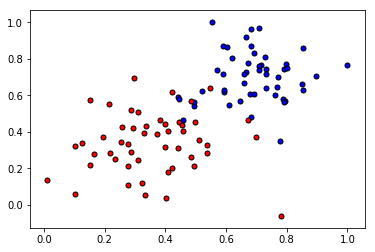

In [26]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [27]:
# Implement the following functions

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(y)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] += learn_rate * X[i][0]
            W[1] += learn_rate * X[i][1]
            b += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -= learn_rate * X[i][0]
            W[1] -= learn_rate * X[i][1]
            b -= learn_rate
    return W, b

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [28]:
np.random.seed(42)

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        # These are the solution lines that get plotted below.
        display(-W[0]/W[1], -b/W[1])
    
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-W[0]/W[1], -b/W[1], 'black')

    # Plotting the data
    plot_points(X, y)
    plt.show()


## Time to train the algorithm!
When we run the function, we'll obtain the following:
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.

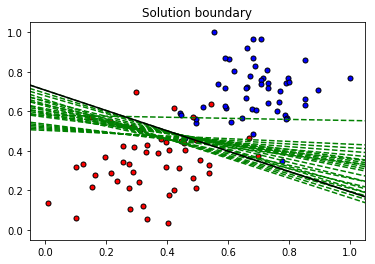

In [30]:
trainPerceptronAlgorithm(X, y)